# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imputation_homework_12.csv',index_col=0)

In [3]:
df

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00
...,...,...
103,6.55,35.75
104,6.60,36.00
105,6.65,36.25
106,6.70,36.50


In [4]:
d1 = df.isna().sum()
d1

x    9
y    0
dtype: int64

In [5]:
df2 = pd.read_csv('imputation_homework_32.csv',index_col=0)

In [6]:
df2

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655
...,...,...
495,9.90,-2.938926
496,9.92,-0.506655
497,9.94,-0.665052
498,9.96,-2.419020


In [7]:
d2 = df2.isna().sum()
d2

time      0
value    48
dtype: int64

In [8]:
df3 = pd.read_csv('imputation_homework_78.csv',index_col=0)
df3

,date,value
0,2015-11-03 00:00:00,13.394304
1,2015-11-04 00:00:00,-3.800715
2,2015-11-05 00:00:00,28.098152
3,2015-11-06 00:00:00,20.500562
4,2015-11-07 00:00:00,33.981955
...,...,...
847,2018-02-27 00:00:00,14.469096
848,2018-02-28 00:00:00,30.466798
849,2018-03-01 00:00:00,13.722157
850,2018-03-02 00:00:00,16.117787


In [9]:
df3

,date,value
0,2015-11-03 00:00:00,13.394304
1,2015-11-04 00:00:00,-3.800715
2,2015-11-05 00:00:00,28.098152
3,2015-11-06 00:00:00,20.500562
4,2015-11-07 00:00:00,33.981955
...,...,...
847,2018-02-27 00:00:00,14.469096
848,2018-02-28 00:00:00,30.466798
849,2018-03-01 00:00:00,13.722157
850,2018-03-02 00:00:00,16.117787


In [10]:
d3 = df3.isna().sum()
d3

date      0
value    81
dtype: int64

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

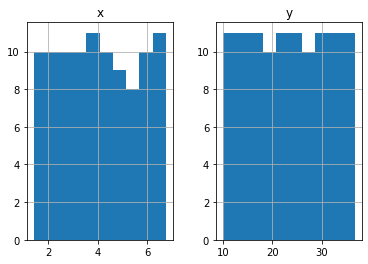

In [11]:
df.hist()

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'value'}>]], dtype=object)

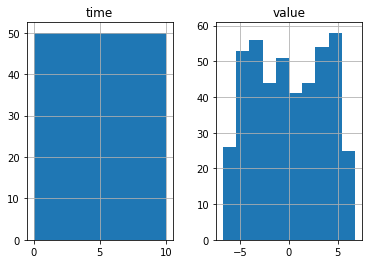

In [12]:
df2.hist()

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

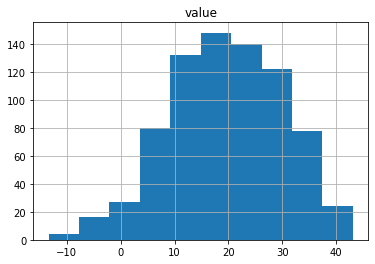

In [13]:
df3.hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

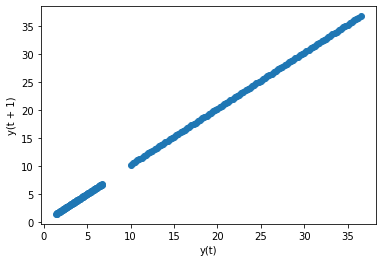

In [14]:
lg = pd.plotting.lag_plot(df,lag=1)
lg

# Order of the data is matters for first Data Frame

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

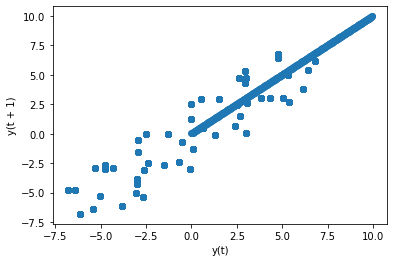

In [15]:
lg2 = pd.plotting.lag_plot(df2,lag=1)
lg2

# Order of the data is Matter For this Data Frame

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

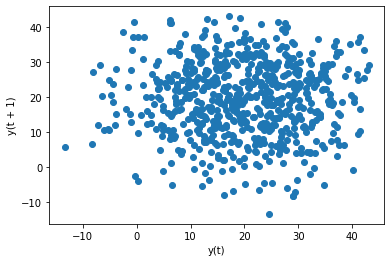

In [16]:
lg3 = pd.plotting.lag_plot(df3['value'],lag=1)
lg3

# In this Data Frame Order of the Data is Doesn't Matters

In [17]:
df = df.interpolate()

In [18]:
d1 = df.isna().sum()
d1

x    0
y    0
dtype: int64

In [19]:
df2 = df2.interpolate()
d2 = df2.isna().sum()
d2

time     0
value    0
dtype: int64

In [20]:
df3['value'] = df3['value'].fillna(int(df3['value'].mean()))
d3 = df3.isna().sum()
d3

date     0
value    0
dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

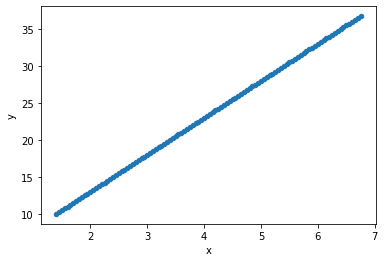

In [21]:
df.plot.scatter(x='x',y='y')

<AxesSubplot:xlabel='time', ylabel='value'>

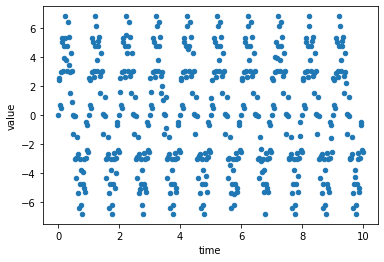

In [22]:
df2.plot.scatter(x='time',y='value')

In [23]:
df3

,date,value
0,2015-11-03 00:00:00,13.394304
1,2015-11-04 00:00:00,-3.800715
2,2015-11-05 00:00:00,28.098152
3,2015-11-06 00:00:00,20.500562
4,2015-11-07 00:00:00,33.981955
...,...,...
847,2018-02-27 00:00:00,14.469096
848,2018-02-28 00:00:00,30.466798
849,2018-03-01 00:00:00,13.722157
850,2018-03-02 00:00:00,16.117787


In [24]:
df3["date"] = df3["date"].astype('datetime64[ns]')

In [25]:
df3['date'] = df3['date'].dt.date

In [26]:
df3

,date,value
0,2015-11-03,13.394304
1,2015-11-04,-3.800715
2,2015-11-05,28.098152
3,2015-11-06,20.500562
4,2015-11-07,33.981955
...,...,...
847,2018-02-27,14.469096
848,2018-02-28,30.466798
849,2018-03-01,13.722157
850,2018-03-02,16.117787


<AxesSubplot:xlabel='date', ylabel='value'>

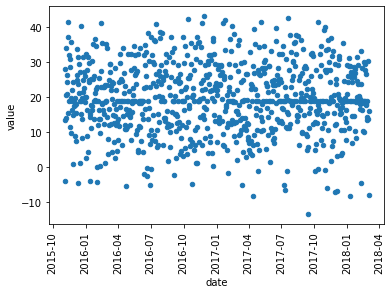

In [27]:
df3.plot.scatter(x='date',y='value',rot = 90)